## Basic Machine Learning Problem and Model



In [91]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/1600/1*zD_Ry3m6bEHCUidlsAqX6g.jpeg")

### Loading the (open source) Dataset

In [58]:
from sklearn.datasets import load_boston
boston = load_boston()


Let's check the shape of the dataset (how many rows and how many columns)

In [59]:
print(boston.data.shape)

(506, 13)


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's take a peek at the data (the first few lines)

In [60]:
import pandas as pd
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


And check the statistics of the full dataset

In [61]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


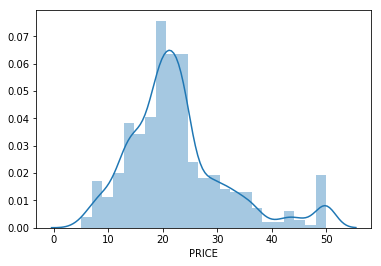

In [67]:
#Let's use seaborn, because it is pretty. ;) 
#See more here. http://seaborn.pydata.org/tutorial/distributions.html
import seaborn as sns
sns.distplot(bos['PRICE']);

We can quickly look at the features we will use for the model

Look at the bottom row to see thinks likely coorelated with price. 

Look along the diagonal to see histograms of each. 

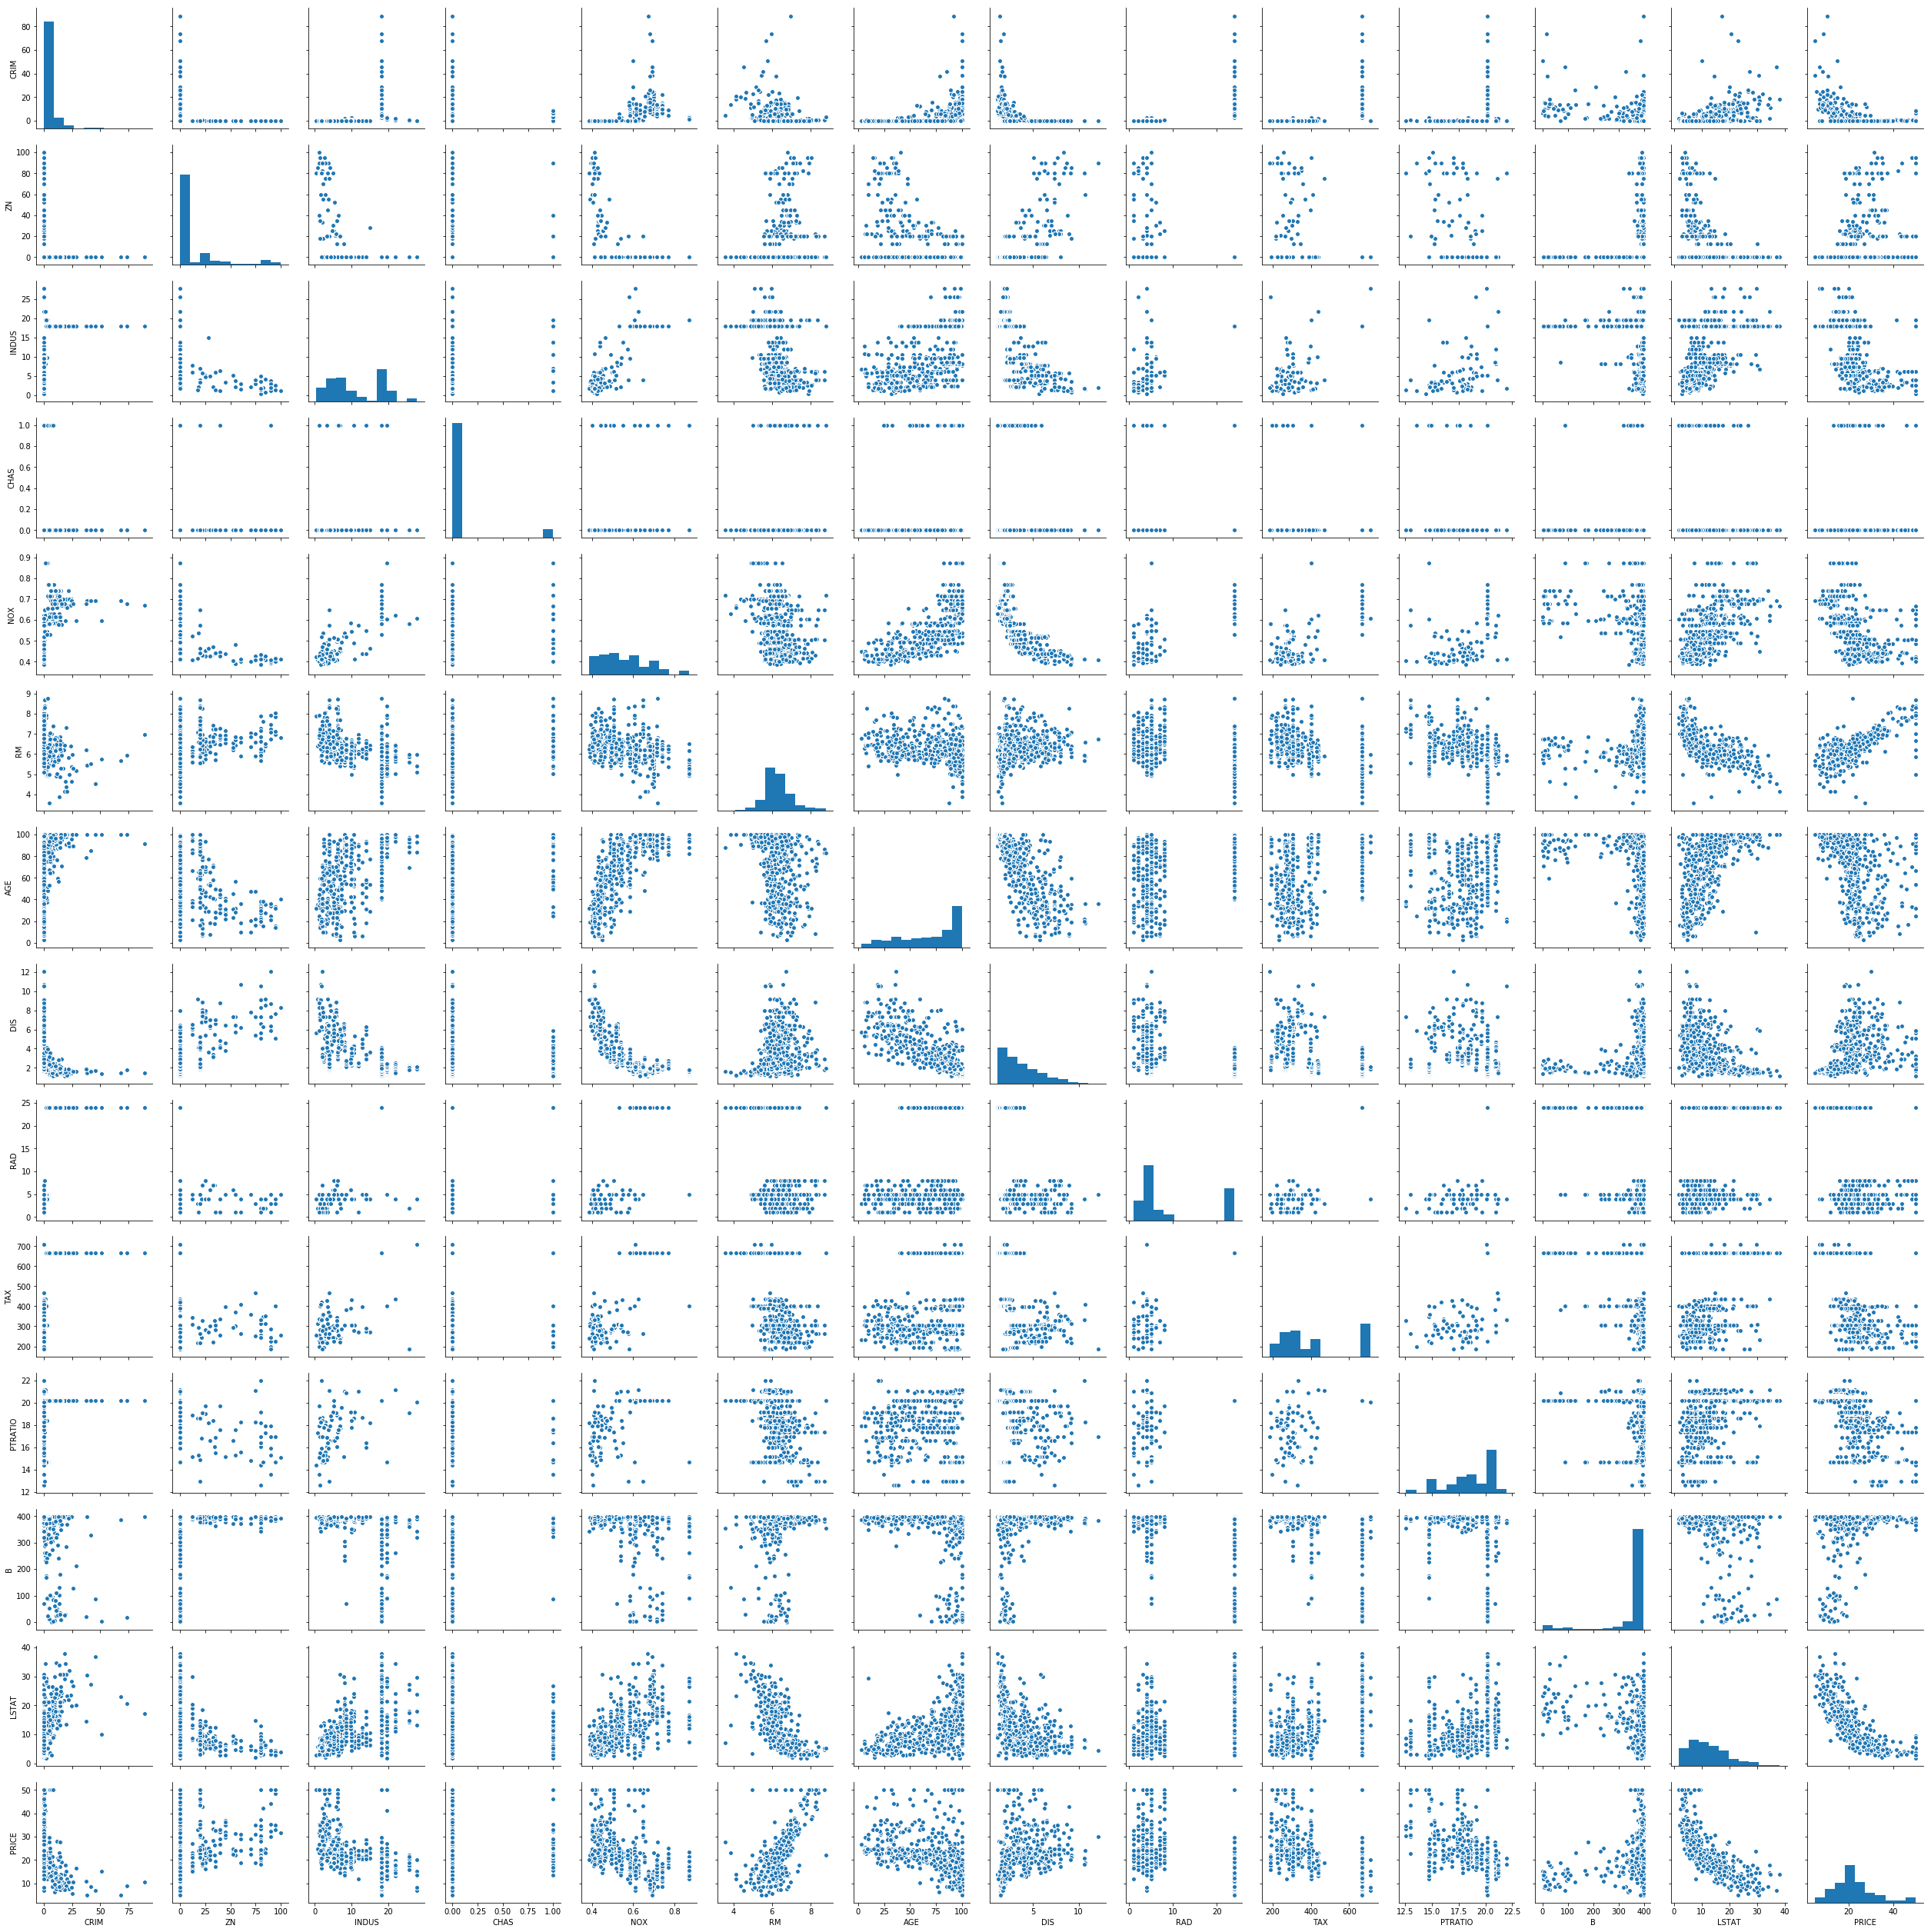

In [92]:
sns.pairplot(bos);

In [18]:
features = bos.drop('PRICE', axis = 1)
prices = bos['PRICE']

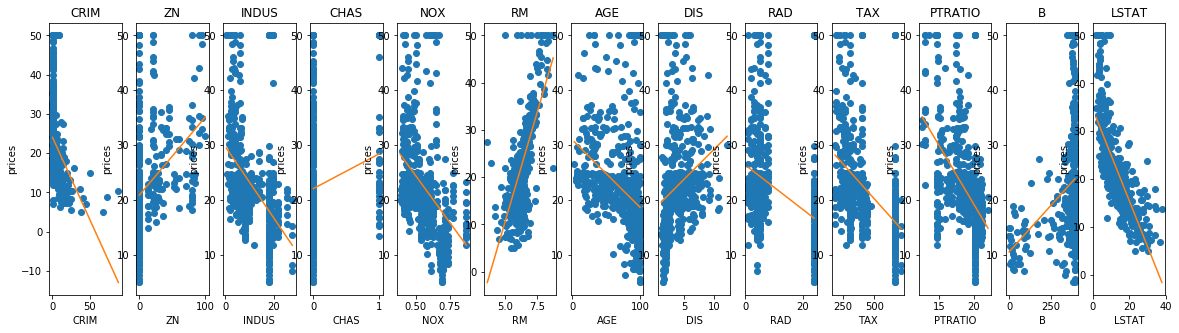

In [22]:
# Using pyplot
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 13, i+1)
    x = bos[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [23]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

## Dataset Split

What is the right ratio for the training data and the testing data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


## Model Training (Fit)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

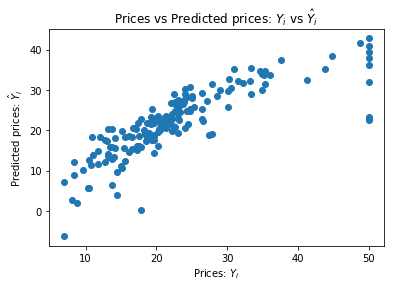

In [115]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


## Error Estimation

In [114]:
import sklearn
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.53045876597463


Why the error is so big?

Maybe we should use a different metric?

In [94]:
mae = sklearn.metrics.mean_absolute_error(Y_test, Y_pred)
mae

3.455034932248343

## Trying Neural Networks

In [84]:
Image(url= "https://cdn-images-1.medium.com/max/1600/1*uz3wd5YeVYlU2JR8rE9VDA.png")


In [72]:
#Define training hyperprameters.
batch_size = 50
num_epochs = 200
learning_rate = 0.01
size_hidden= 100

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches
cols=X_train.shape[1] #Number of columns in input matrix
n_output=1


## NN Definition

In [73]:
import torch
import torch.nn.functional as F
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print("Executing the model on :",device)
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(cols, size_hidden)   # hidden layer
        self.predict = torch.nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
net = Net(cols, size_hidden, n_output)

Executing the model on : cpu


In [85]:
Image(url= "https://cdn-images-1.medium.com/max/1600/1*-a-flCLHLCGM0-7TOcNJnQ.png")

## Optimizer Definition

In [74]:
#Adam is a specific flavor of gradient decent which is typically better
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
criterion = torch.nn.MSELoss(reduction='sum')  # this is for regression mean squared loss

In [86]:
Image(url= "http://ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif")


## NN Training

In [125]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, Y_train = shuffle(X_train, Y_train)
    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.FloatTensor(Y_train[start:end].ravel()))
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0

Epoch 1 loss:  2627.8536987304688
Epoch 2 loss:  2258.8968200683594
Epoch 3 loss:  2386.770782470703
Epoch 4 loss:  2029.8094635009766
Epoch 5 loss:  1789.4649353027344
Epoch 6 loss:  1854.1147918701172
Epoch 7 loss:  1906.6401672363281
Epoch 8 loss:  2225.6554260253906
Epoch 9 loss:  1918.5083770751953
Epoch 10 loss:  1733.0596923828125
Epoch 11 loss:  1859.8104095458984
Epoch 12 loss:  1692.3857879638672
Epoch 13 loss:  1764.557357788086
Epoch 14 loss:  2042.1537475585938
Epoch 15 loss:  2143.9487915039062
Epoch 16 loss:  2286.7734375
Epoch 17 loss:  1810.633773803711
Epoch 18 loss:  1912.858627319336
Epoch 19 loss:  2150.8599395751953
Epoch 20 loss:  2363.3096771240234
Epoch 21 loss:  2177.7948303222656
Epoch 22 loss:  2040.4591064453125
Epoch 23 loss:  2000.9820709228516
Epoch 24 loss:  2026.508560180664
Epoch 25 loss:  1408.1213073730469
Epoch 26 loss:  1724.4249572753906
Epoch 27 loss:  1870.8678436279297
Epoch 28 loss:  1554.3158111572266
Epoch 29 loss:  1393.1345672607422
Epoch

## Error Estimation

In [121]:
X = Variable(torch.FloatTensor(X_test.values)) 
result = net(X)
pred=result.data[:,0].numpy()
print(len(pred),len(Y_test))

167 167


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

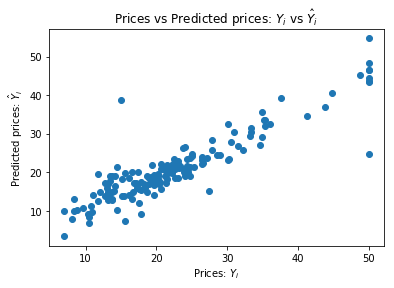

In [126]:
plt.scatter(Y_test, pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [127]:
mse = sklearn.metrics.mean_squared_error(Y_test, pred)
print(mse)

19.01983458563444


In [128]:
mae = sklearn.metrics.mean_absolute_error(Y_test, pred)
print(mae)

3.0279014724457336
